<a href="https://colab.research.google.com/github/Ashahroz/k201220ThesisCode/blob/main/UKM_IDS20_Thesis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/UKM-IDS20.csv')


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, TimeDistributed
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#from pycm import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler  # For class imbalance handling
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import csv

In [3]:
print(data.columns)


Index(['dur', 'trnspt', 'srvs', 'flag_n', 'flag_arst', 'flag_uc', 'flag_sign',
       'flag_synrst', 'flag_a', 'flag_othr', 'src_pkts', 'dst_pkts',
       'urg_bits', 'push_pkts', 'no_lnkd', 'arp', 'src_ttl', 'dst_ttl',
       'pkts_dirctn', 'src_byts', 'dst_byts', 'src_avg_byts', 'dst_avg_byts',
       'strt_t', 'end_t', 'dst_host_count', 'host_dst _count', 'rtt_first_ack',
       'rtt_avg', 'avg_t_sent', 'avg_t_got', 'repeated', 'fst_src_sqc',
       'fst_dst_sqc', 'src_re', 'dst_re', 'src_fast_re', 'dst_fast_re',
       'ovrlp_count', 'long_frag_count', 'dns_ratio', 'avg_rr',
       'http_rqsts_count', 'http_redirct_count', 'http_clnt_error_count',
       'http_srv_error_count', 'Class', 'Binary'],
      dtype='object')


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Labels

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the encoded data into training and testing sets
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)


In [5]:
import numpy as np

# Check for infinite values
print(np.any(np.isinf(X_train_enc)))
print(np.any(np.isinf(X_test_enc)))

# Check for NaN values
print(np.any(np.isnan(X_train_enc)))
print(np.any(np.isnan(X_test_enc)))


False
False
False
False


In [6]:
X_train_enc.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_enc.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with mean or median
X_train_enc.fillna(X_train_enc.mean(), inplace=True)
X_test_enc.fillna(X_test_enc.mean(), inplace=True)


In [9]:
from sklearn.linear_model import RidgeClassifier

# Create the Ridge Classifier model
ridge_clf = RidgeClassifier()

# Fit the model on the training data
ridge_clf.fit(X_train_enc, y_train)

# Make predictions
predictions = ridge_clf.predict(X_test_enc)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Ridge Classifier with encoded data: {accuracy}")


Accuracy of Ridge Classifier with encoded data: 0.9903100775193798


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.30059e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Accuracy: 0.9903
Precision: 0.9910
Recall: 0.9903
F1 Score: 0.9904


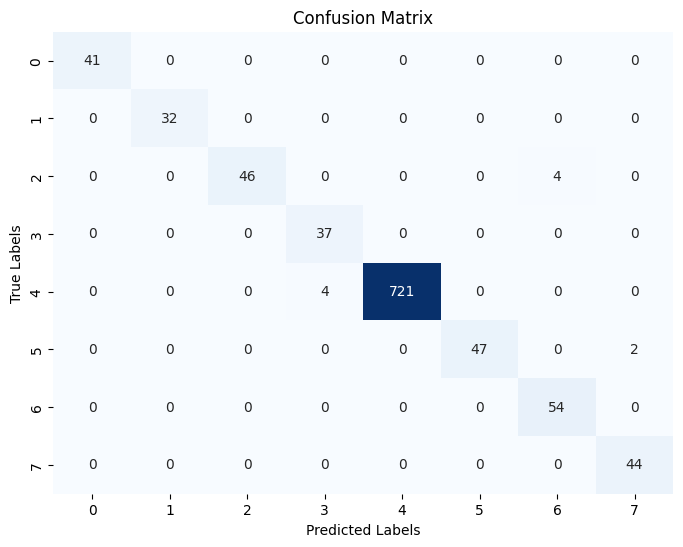

In [10]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate recall
recall = recall_score(y_test, predictions, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy (Logistic Regression): 0.8963
Precision (Logistic Regression): 0.8915
Recall (Logistic Regression): 0.8963
F1 Score (Logistic Regression): 0.8915


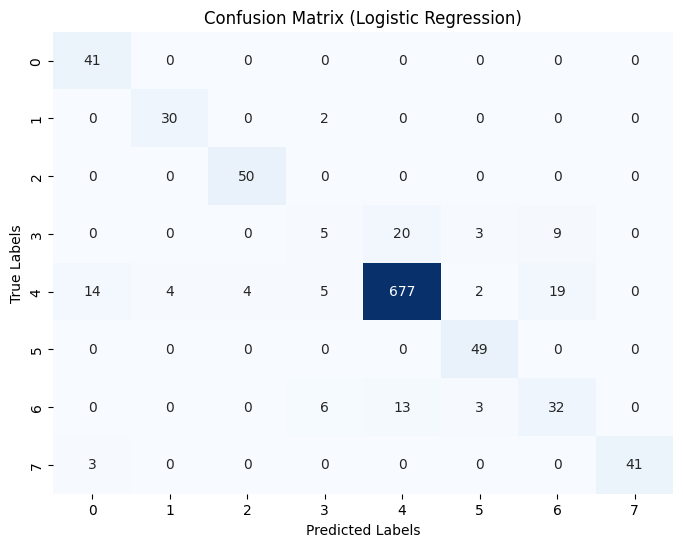

In [11]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_reg.fit(X_train_enc, y_train)

# Make predictions
logistic_predictions = logistic_reg.predict(X_test_enc)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, logistic_predictions)

# Calculate precision
precision_logistic = precision_score(y_test, logistic_predictions, average='weighted')

# Calculate recall
recall_logistic = recall_score(y_test, logistic_predictions, average='weighted')

# Calculate F1 score
f1_logistic = f1_score(y_test, logistic_predictions, average='weighted')

print(f"Accuracy (Logistic Regression): {accuracy_logistic:.4f}")
print(f"Precision (Logistic Regression): {precision_logistic:.4f}")
print(f"Recall (Logistic Regression): {recall_logistic:.4f}")
print(f"F1 Score (Logistic Regression): {f1_logistic:.4f}")

# Plot confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (LinearSVC): 0.7791
Precision (LinearSVC): 0.8179
Recall (LinearSVC): 0.7791
F1 Score (LinearSVC): 0.7837


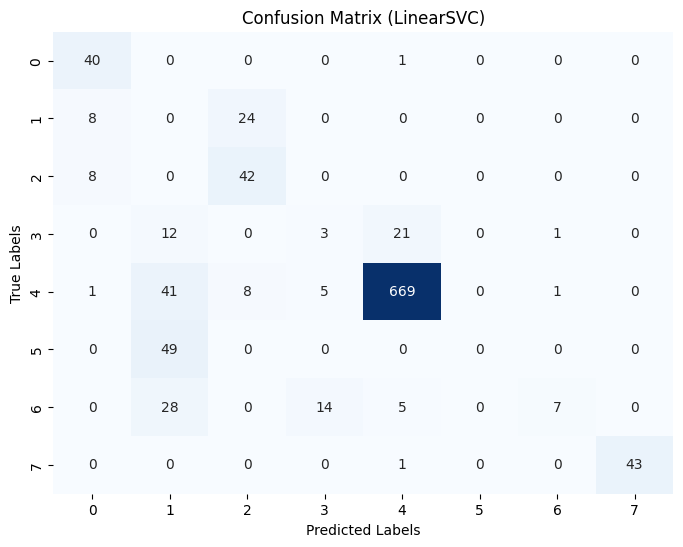

In [12]:
from sklearn.svm import LinearSVC

# Create the LinearSVC model
linear_svc = LinearSVC(max_iter=10000)

# Fit the model on the training data
linear_svc.fit(X_train_enc, y_train)

# Make predictions
linear_svc_predictions = linear_svc.predict(X_test_enc)

# Calculate accuracy
accuracy_linear_svc = accuracy_score(y_test, linear_svc_predictions)

# Calculate precision
precision_linear_svc = precision_score(y_test, linear_svc_predictions, average='weighted')

# Calculate recall
recall_linear_svc = recall_score(y_test, linear_svc_predictions, average='weighted')

# Calculate F1 score
f1_linear_svc = f1_score(y_test, linear_svc_predictions, average='weighted')

print(f"Accuracy (LinearSVC): {accuracy_linear_svc:.4f}")
print(f"Precision (LinearSVC): {precision_linear_svc:.4f}")
print(f"Recall (LinearSVC): {recall_linear_svc:.4f}")
print(f"F1 Score (LinearSVC): {f1_linear_svc:.4f}")

# Plot confusion matrix for LinearSVC
cm_linear_svc = confusion_matrix(y_test, linear_svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (LinearSVC)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (SVC): 0.7326
Precision (SVC): 0.5498
Recall (SVC): 0.7326
F1 Score (SVC): 0.6276


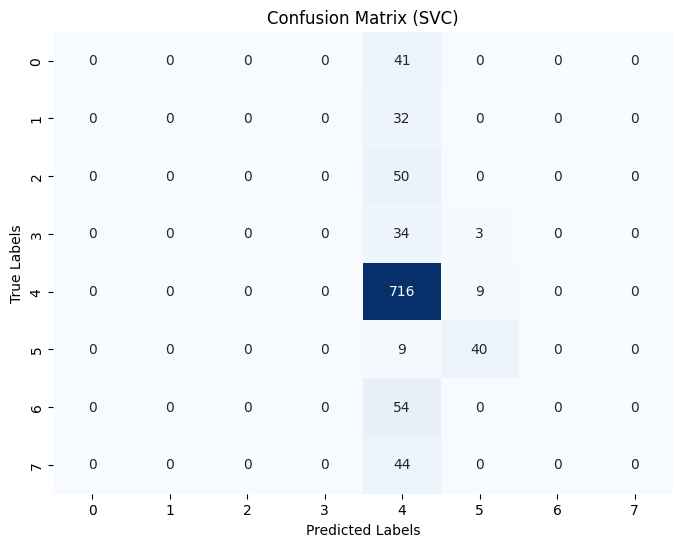

In [13]:
from sklearn.svm import SVC

# Create the SVC model
svc = SVC()

# Fit the model on the training data
svc.fit(X_train_enc, y_train)

# Make predictions
svc_predictions = svc.predict(X_test_enc)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, svc_predictions)

# Calculate precision
precision_svc = precision_score(y_test, svc_predictions, average='weighted')

# Calculate recall
recall_svc = recall_score(y_test, svc_predictions, average='weighted')

# Calculate F1 score
f1_svc = f1_score(y_test, svc_predictions, average='weighted')

print(f"Accuracy (SVC): {accuracy_svc:.4f}")
print(f"Precision (SVC): {precision_svc:.4f}")
print(f"Recall (SVC): {recall_svc:.4f}")
print(f"F1 Score (SVC): {f1_svc:.4f}")

# Plot confusion matrix for SVC
cm_svc = confusion_matrix(y_test, svc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVC)')
plt.show()


Accuracy (GaussianNB): 0.5349
Precision (GaussianNB): 0.8287
Recall (GaussianNB): 0.5349
F1 Score (GaussianNB): 0.5875


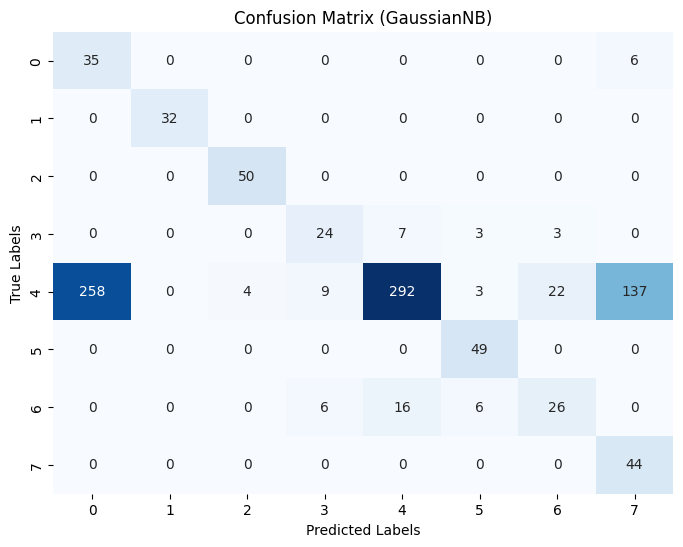

In [14]:
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train_enc, y_train)

# Make predictions
gnb_predictions = gnb.predict(X_test_enc)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, gnb_predictions)

# Calculate precision
precision_gnb = precision_score(y_test, gnb_predictions, average='weighted')

# Calculate recall
recall_gnb = recall_score(y_test, gnb_predictions, average='weighted')

# Calculate F1 score
f1_gnb = f1_score(y_test, gnb_predictions, average='weighted')

print(f"Accuracy (GaussianNB): {accuracy_gnb:.4f}")
print(f"Precision (GaussianNB): {precision_gnb:.4f}")
print(f"Recall (GaussianNB): {recall_gnb:.4f}")
print(f"F1 Score (GaussianNB): {f1_gnb:.4f}")

# Plot confusion matrix for GaussianNB
cm_gnb = confusion_matrix(y_test, gnb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (GaussianNB)')
plt.show()


Accuracy (BernoulliNB): 0.8953
Precision (BernoulliNB): 0.9482
Recall (BernoulliNB): 0.8953
F1 Score (BernoulliNB): 0.9094


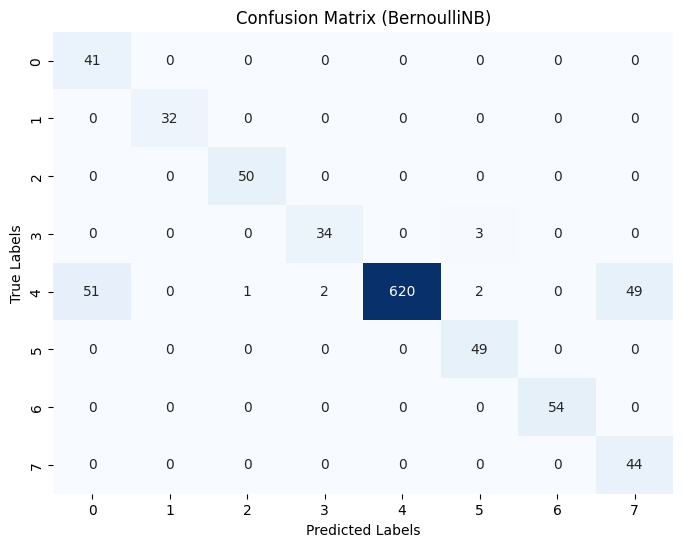

In [15]:
from sklearn.naive_bayes import BernoulliNB

# Create the Bernoulli Naive Bayes model
bnb = BernoulliNB()

# Fit the model on the training data
bnb.fit(X_train_enc, y_train)

# Make predictions
bnb_predictions = bnb.predict(X_test_enc)

# Calculate accuracy
accuracy_bnb = accuracy_score(y_test, bnb_predictions)

# Calculate precision
precision_bnb = precision_score(y_test, bnb_predictions, average='weighted')

# Calculate recall
recall_bnb = recall_score(y_test, bnb_predictions, average='weighted')

# Calculate F1 score
f1_bnb = f1_score(y_test, bnb_predictions, average='weighted')

print(f"Accuracy (BernoulliNB): {accuracy_bnb:.4f}")
print(f"Precision (BernoulliNB): {precision_bnb:.4f}")
print(f"Recall (BernoulliNB): {recall_bnb:.4f}")
print(f"F1 Score (BernoulliNB): {f1_bnb:.4f}")

# Plot confusion matrix for BernoulliNB
cm_bnb = confusion_matrix(y_test, bnb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (BernoulliNB)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (SGD Classifier): 0.7306
Precision (SGD Classifier): 0.6156
Recall (SGD Classifier): 0.7306
F1 Score (SGD Classifier): 0.6661


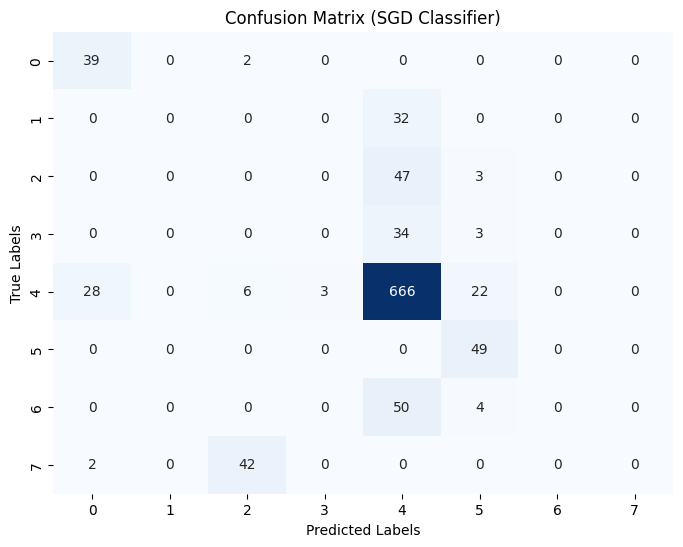

In [16]:
from sklearn.linear_model import SGDClassifier

# Create the SGD Classifier model
sgd = SGDClassifier()

# Fit the model on the training data
sgd.fit(X_train_enc, y_train)

# Make predictions
sgd_predictions = sgd.predict(X_test_enc)

# Calculate accuracy
accuracy_sgd = accuracy_score(y_test, sgd_predictions)

# Calculate precision
precision_sgd = precision_score(y_test, sgd_predictions, average='weighted')

# Calculate recall
recall_sgd = recall_score(y_test, sgd_predictions, average='weighted')

# Calculate F1 score
f1_sgd = f1_score(y_test, sgd_predictions, average='weighted')

print(f"Accuracy (SGD Classifier): {accuracy_sgd:.4f}")
print(f"Precision (SGD Classifier): {precision_sgd:.4f}")
print(f"Recall (SGD Classifier): {recall_sgd:.4f}")
print(f"F1 Score (SGD Classifier): {f1_sgd:.4f}")

# Plot confusion matrix for SGD Classifier
cm_sgd = confusion_matrix(y_test, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SGD Classifier)')
plt.show()


Accuracy (RandomForestClassifier): 1.0000
Precision (RandomForestClassifier): 1.0000
Recall (RandomForestClassifier): 1.0000
F1 Score (RandomForestClassifier): 1.0000


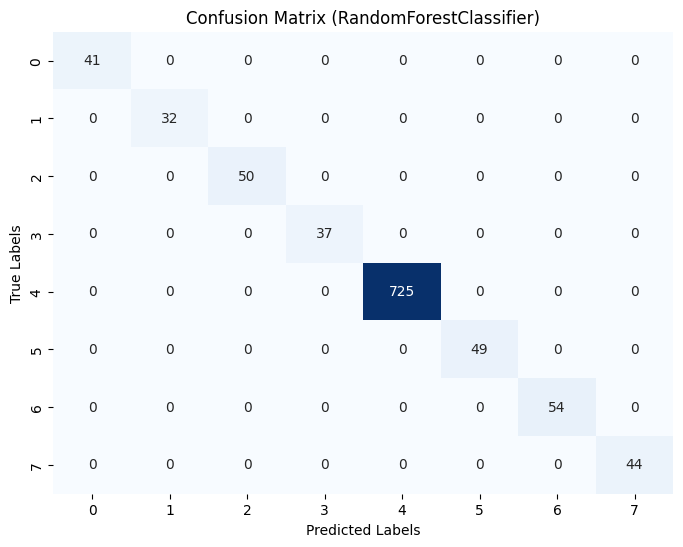

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier model
random_forest = RandomForestClassifier()

# Fit the model on the training data
random_forest.fit(X_train_enc, y_train)

# Make predictions
rf_predictions = random_forest.predict(X_test_enc)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, rf_predictions)

# Calculate precision
precision_rf = precision_score(y_test, rf_predictions, average='weighted')

# Calculate recall
recall_rf = recall_score(y_test, rf_predictions, average='weighted')

# Calculate F1 score
f1_rf = f1_score(y_test, rf_predictions, average='weighted')

print(f"Accuracy (RandomForestClassifier): {accuracy_rf:.4f}")
print(f"Precision (RandomForestClassifier): {precision_rf:.4f}")
print(f"Recall (RandomForestClassifier): {recall_rf:.4f}")
print(f"F1 Score (RandomForestClassifier): {f1_rf:.4f}")

# Plot confusion matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (RandomForestClassifier)')
plt.show()


Accuracy (ExtraTreesClassifier): 1.0000
Precision (ExtraTreesClassifier): 1.0000
Recall (ExtraTreesClassifier): 1.0000
F1 Score (ExtraTreesClassifier): 1.0000


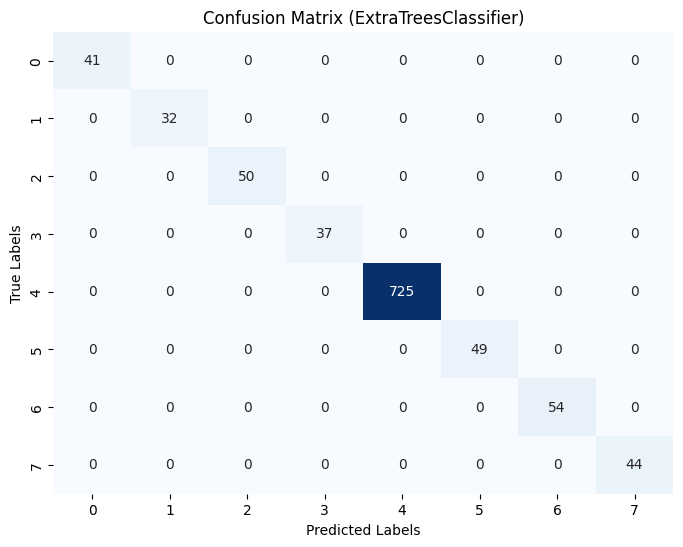

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the ExtraTreesClassifier model
extra_trees = ExtraTreesClassifier()

# Fit the model on the training data
extra_trees.fit(X_train_enc, y_train)

# Make predictions
et_predictions = extra_trees.predict(X_test_enc)

# Calculate accuracy
accuracy_et = accuracy_score(y_test, et_predictions)

# Calculate precision
precision_et = precision_score(y_test, et_predictions, average='weighted')

# Calculate recall
recall_et = recall_score(y_test, et_predictions, average='weighted')

# Calculate F1 score
f1_et = f1_score(y_test, et_predictions, average='weighted')

print(f"Accuracy (ExtraTreesClassifier): {accuracy_et:.4f}")
print(f"Precision (ExtraTreesClassifier): {precision_et:.4f}")
print(f"Recall (ExtraTreesClassifier): {recall_et:.4f}")
print(f"F1 Score (ExtraTreesClassifier): {f1_et:.4f}")

# Plot confusion matrix for ExtraTreesClassifier
cm_et = confusion_matrix(y_test, et_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_et, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (ExtraTreesClassifier)')
plt.show()


Accuracy (DecisionTreeClassifier): 0.9981
Precision (DecisionTreeClassifier): 0.9981
Recall (DecisionTreeClassifier): 0.9981
F1 Score (DecisionTreeClassifier): 0.9981


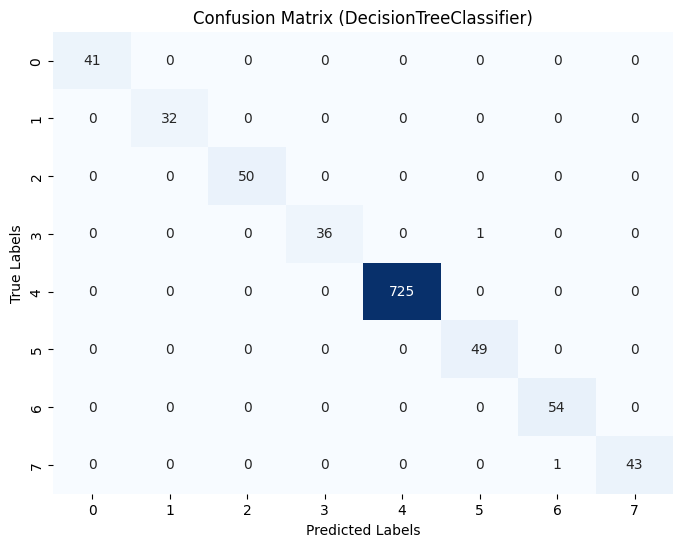

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Create the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree.fit(X_train_enc, y_train)

# Make predictions
dt_predictions = decision_tree.predict(X_test_enc)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, dt_predictions)

# Calculate precision
precision_dt = precision_score(y_test, dt_predictions, average='weighted')

# Calculate recall
recall_dt = recall_score(y_test, dt_predictions, average='weighted')

# Calculate F1 score
f1_dt = f1_score(y_test, dt_predictions, average='weighted')

print(f"Accuracy (DecisionTreeClassifier): {accuracy_dt:.4f}")
print(f"Precision (DecisionTreeClassifier): {precision_dt:.4f}")
print(f"Recall (DecisionTreeClassifier): {recall_dt:.4f}")
print(f"F1 Score (DecisionTreeClassifier): {f1_dt:.4f}")

# Plot confusion matrix for DecisionTreeClassifier
cm_dt = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (DecisionTreeClassifier)')
plt.show()


Accuracy (NearestCentroid): 0.2209
Precision (NearestCentroid): 0.6474
Recall (NearestCentroid): 0.2209
F1 Score (NearestCentroid): 0.1780


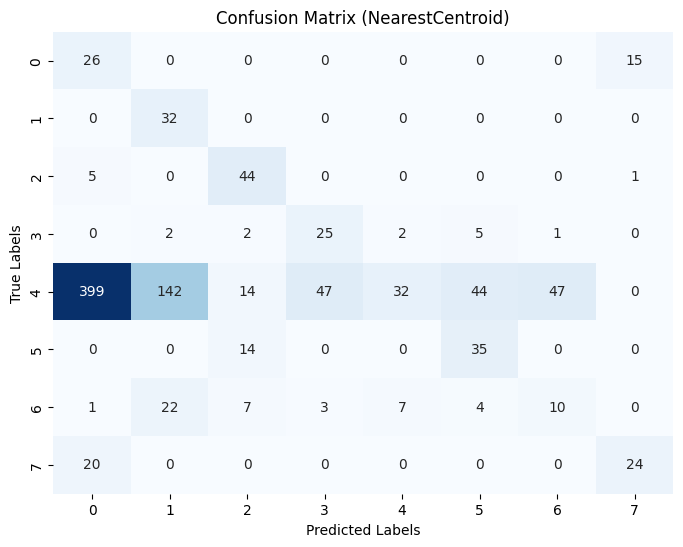

In [20]:
from sklearn.neighbors import NearestCentroid

# Create the NearestCentroid model
nearest_centroid = NearestCentroid()

# Fit the model on the training data
nearest_centroid.fit(X_train_enc, y_train)

# Make predictions
nc_predictions = nearest_centroid.predict(X_test_enc)

# Calculate accuracy
accuracy_nc = accuracy_score(y_test, nc_predictions)

# Calculate precision
precision_nc = precision_score(y_test, nc_predictions, average='weighted')

# Calculate recall
recall_nc = recall_score(y_test, nc_predictions, average='weighted')

# Calculate F1 score
f1_nc = f1_score(y_test, nc_predictions, average='weighted')

print(f"Accuracy (NearestCentroid): {accuracy_nc:.4f}")
print(f"Precision (NearestCentroid): {precision_nc:.4f}")
print(f"Recall (NearestCentroid): {recall_nc:.4f}")
print(f"F1 Score (NearestCentroid): {f1_nc:.4f}")

# Plot confusion matrix for NearestCentroid
cm_nc = confusion_matrix(y_test, nc_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (NearestCentroid)')
plt.show()


Accuracy (LinearDiscriminantAnalysis): 0.9787
Precision (LinearDiscriminantAnalysis): 0.9810
Recall (LinearDiscriminantAnalysis): 0.9787
F1 Score (LinearDiscriminantAnalysis): 0.9791


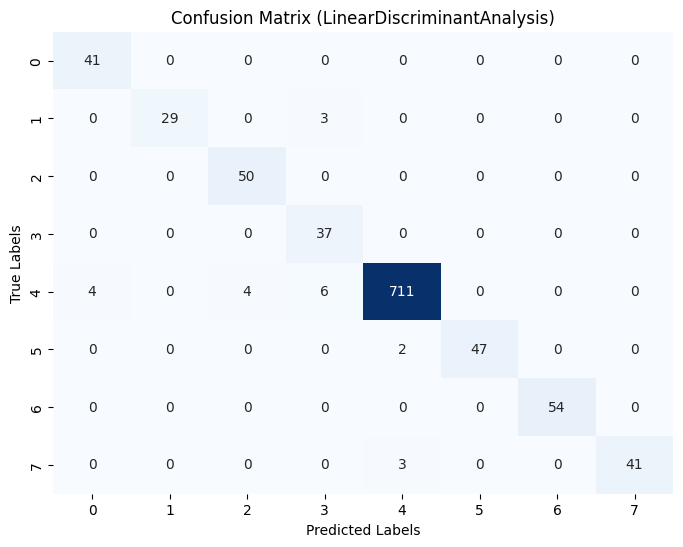

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the LinearDiscriminantAnalysis model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train_enc, y_train)

# Make predictions
lda_predictions = lda.predict(X_test_enc)

# Calculate accuracy
accuracy_lda = accuracy_score(y_test, lda_predictions)

# Calculate precision
precision_lda = precision_score(y_test, lda_predictions, average='weighted')

# Calculate recall
recall_lda = recall_score(y_test, lda_predictions, average='weighted')

# Calculate F1 score
f1_lda = f1_score(y_test, lda_predictions, average='weighted')

print(f"Accuracy (LinearDiscriminantAnalysis): {accuracy_lda:.4f}")
print(f"Precision (LinearDiscriminantAnalysis): {precision_lda:.4f}")
print(f"Recall (LinearDiscriminantAnalysis): {recall_lda:.4f}")
print(f"F1 Score (LinearDiscriminantAnalysis): {f1_lda:.4f}")

# Plot confusion matrix for LinearDiscriminantAnalysis
cm_lda = confusion_matrix(y_test, lda_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (LinearDiscriminantAnalysis)')
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.40, random_state=42)

In [24]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dur                    2579 non-null   float64
 1   trnspt                 2579 non-null   int64  
 2   srvs                   2579 non-null   int64  
 3   flag_n                 2579 non-null   int64  
 4   flag_arst              2579 non-null   int64  
 5   flag_uc                2579 non-null   int64  
 6   flag_sign              2579 non-null   int64  
 7   flag_synrst            2579 non-null   int64  
 8   flag_a                 2579 non-null   int64  
 9   flag_othr              2579 non-null   int64  
 10  src_pkts               2579 non-null   int64  
 11  dst_pkts               2579 non-null   float64
 12  urg_bits               2579 non-null   int64  
 13  push_pkts              2579 non-null   int64  
 14  no_lnkd                2579 non-null   int64  
 15  arp 

In [8]:
data['Class'].value_counts()


Normal                 1769
Mass HTTP requests      140
Port scanning           123
TCP flood               121
ARP poisining           116
UDP data flood          108
Metasploit exploits     106
BeEF HTTP exploits       96
Name: Class, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Embedding

# Prepare input data and labels
X = data.drop(['Class', 'Binary'], axis=1)  # Features
y = data['Class']  # Labels

# Split categorical and numerical features based on the column names you provided
categorical_cols = ['flag_n', 'flag_arst', 'flag_uc', 'flag_sign', 'flag_synrst', 'flag_a', 'flag_othr']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['Class', 'Binary']]

# Handling categorical features
X_categorical = X[categorical_cols]
X_categorical_encoded = pd.get_dummies(X_categorical)

# Handling numerical features
X_numerical = X[numerical_cols]

# Tokenize the text data (from categorical features)
tokenizer = Tokenizer()
text_data = X_categorical_encoded.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences to a fixed length
max_sequence_length = 50  # Define your sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Combine numerical features with tokenized categorical features
X_combined = pd.concat([X_numerical, pd.DataFrame(padded_sequences)], axis=1)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.4, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)


# Reshape X_train and X_test for LSTM input
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the number of classes in your dataset
num_classes = len(y.unique())  # Replace 'y' with your target column

# Define your model
model = Sequential()
model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(1, X_train.shape[2])))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function for multiclass classification

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluation metrics for multiclass classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)  # Retrieve the index of the highest probability as predicted class

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")



Epoch 1/5
44/44 [==============================] - 22s 82ms/step - loss: 1.6122 - accuracy: 0.6099 - val_loss: 1.0709 - val_accuracy: 0.7290
Epoch 2/5
44/44 [==============================] - 1s 19ms/step - loss: 0.8818 - accuracy: 0.7486 - val_loss: 0.7388 - val_accuracy: 0.7935
Epoch 3/5
44/44 [==============================] - 1s 22ms/step - loss: 0.7198 - accuracy: 0.7543 - val_loss: 0.6598 - val_accuracy: 0.7935
Epoch 4/5
44/44 [==============================] - 1s 18ms/step - loss: 0.6661 - accuracy: 0.7543 - val_loss: 0.6284 - val_accuracy: 0.7935
Epoch 5/5
33/33 [==============================] - 3s 3ms/step
Accuracy: 0.8187984496124031, Precision: 0.7105366034491079, Recall: 0.8187984496124031, F1 Score: 0.7574209676121951


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare input data and labels
X = data.drop(['Class', 'Binary'], axis=1)  # Features
y = data['Class']  # Labels

# Split categorical and numerical features based on the column names you provided
categorical_cols = ['flag_n', 'flag_arst', 'flag_uc', 'flag_sign', 'flag_synrst', 'flag_a', 'flag_othr']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['Class', 'Binary']]

# Handling categorical features
X_categorical = X[categorical_cols]
X_categorical_encoded = pd.get_dummies(X_categorical)

# Handling numerical features
X_numerical = X[numerical_cols]

# Tokenize the text data (from categorical features)
tokenizer = Tokenizer()
text_data = X_categorical_encoded.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences to a fixed length
max_sequence_length = 50  # Define your sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Combine numerical features with tokenized categorical features
X_combined = pd.concat([X_numerical, pd.DataFrame(padded_sequences)], axis=1)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.4, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Reshape X_train and X_test for LSTM input
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the number of classes in your dataset
num_classes = len(y.unique())  # Replace 'y' with your target column

# Define your model with stacked LSTM layers
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=16))  # Last LSTM layer, not returning sequences

model.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function for multiclass classification

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluation metrics for multiclass classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)  # Retrieve the index of the highest probability as predicted class

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Epoch 1/5
44/44 [==============================] - 17s 87ms/step - loss: 2.0044 - accuracy: 0.5927 - val_loss: 1.8698 - val_accuracy: 0.6839
Epoch 2/5
44/44 [==============================] - 0s 8ms/step - loss: 1.5344 - accuracy: 0.6739 - val_loss: 1.2101 - val_accuracy: 0.6839
Epoch 3/5
44/44 [==============================] - 0s 8ms/step - loss: 1.1056 - accuracy: 0.6803 - val_loss: 1.0300 - val_accuracy: 0.7161
Epoch 4/5
44/44 [==============================] - 0s 9ms/step - loss: 1.0090 - accuracy: 0.7148 - val_loss: 0.9590 - val_accuracy: 0.7161
Epoch 5/5
33/33 [==============================] - 2s 4ms/step
Accuracy: 0.7451550387596899, Precision: 0.5587295646301264, Recall: 0.7451550387596899, F1 Score: 0.6378037501618842


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare input data and labels
X = data.drop(['Class', 'Binary'], axis=1)  # Features
y = data['Class']  # Labels

# Split categorical and numerical features based on the column names you provided
categorical_cols = ['flag_n', 'flag_arst', 'flag_uc', 'flag_sign', 'flag_synrst', 'flag_a', 'flag_othr']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['Class', 'Binary']]

# Handling categorical features
X_categorical = X[categorical_cols]
X_categorical_encoded = pd.get_dummies(X_categorical)

# Handling numerical features
X_numerical = X[numerical_cols]

# Tokenize the text data (from categorical features)
tokenizer = Tokenizer()
text_data = X_categorical_encoded.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences to a fixed length
max_sequence_length = 50  # Define your sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Combine numerical features with tokenized categorical features
X_combined = pd.concat([X_numerical, pd.DataFrame(padded_sequences)], axis=1)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.4, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Reshape X_train and X_test for LSTM input
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes in your dataset
num_classes = len(y.unique())  # Replace 'y' with your target column

# Define your model with a Vanilla LSTM layer
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))  # Vanilla LSTM layer

model.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function for multiclass classification

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluation metrics for multiclass classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)  # Retrieve the index of the highest probability as predicted class

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Epoch 1/5
44/44 [==============================] - 9s 105ms/step - loss: 1.5771 - accuracy: 0.5618 - val_loss: 1.2401 - val_accuracy: 0.6839
Epoch 2/5
44/44 [==============================] - 4s 80ms/step - loss: 1.2760 - accuracy: 0.6739 - val_loss: 1.2333 - val_accuracy: 0.6839
Epoch 3/5
44/44 [==============================] - 3s 70ms/step - loss: 1.2698 - accuracy: 0.6739 - val_loss: 1.2360 - val_accuracy: 0.6839
Epoch 4/5
44/44 [==============================] - 2s 43ms/step - loss: 1.2716 - accuracy: 0.6739 - val_loss: 1.2306 - val_accuracy: 0.6839
Epoch 5/5
33/33 [==============================] - 1s 13ms/step
Accuracy: 0.7025193798449613, Precision: 0.49353347905774897, Recall: 0.7025193798449613, F1 Score: 0.5797684125072247


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import GRU, Dense

# Prepare input data and labels
X = data.drop(['Class', 'Binary'], axis=1)  # Features
y = data['Class']  # Labels

# Split categorical and numerical features based on the column names you provided
categorical_cols = ['flag_n', 'flag_arst', 'flag_uc', 'flag_sign', 'flag_synrst', 'flag_a', 'flag_othr']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['Class', 'Binary']]

# Handling categorical features
X_categorical = X[categorical_cols]
X_categorical_encoded = pd.get_dummies(X_categorical)

# Handling numerical features
X_numerical = X[numerical_cols]

# Tokenize the text data (from categorical features)
tokenizer = Tokenizer()
text_data = X_categorical_encoded.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences to a fixed length
max_sequence_length = 50  # Define your sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Combine numerical features with tokenized categorical features
X_combined = pd.concat([X_numerical, pd.DataFrame(padded_sequences)], axis=1)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.4, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Reshape X_train and X_test for GRU input
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes in your dataset
num_classes = len(y.unique())  # Replace 'y' with your target column

# Define your model with a GRU layer
model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], 1)))  # GRU layer

model.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function for multiclass classification

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluation metrics for multiclass classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)  # Retrieve the index of the highest probability as predicted class

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Epoch 1/5
44/44 [==============================] - 10s 128ms/step - loss: 1.5284 - accuracy: 0.6487 - val_loss: 1.2643 - val_accuracy: 0.6839
Epoch 2/5
44/44 [==============================] - 3s 58ms/step - loss: 1.2900 - accuracy: 0.6739 - val_loss: 1.2443 - val_accuracy: 0.6839
Epoch 3/5
44/44 [==============================] - 3s 69ms/step - loss: 1.2864 - accuracy: 0.6739 - val_loss: 1.2452 - val_accuracy: 0.6839
Epoch 4/5
44/44 [==============================] - 2s 41ms/step - loss: 1.2775 - accuracy: 0.6739 - val_loss: 1.2382 - val_accuracy: 0.6839
Epoch 5/5
33/33 [==============================] - 1s 11ms/step
Accuracy: 0.7025193798449613, Precision: 0.49353347905774897, Recall: 0.7025193798449613, F1 Score: 0.5797684125072247


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare input data and labels
X = data.drop(['Class', 'Binary'], axis=1)  # Features
y = data['Class']  # Labels

# Split categorical and numerical features based on the column names you provided
categorical_cols = ['flag_n', 'flag_arst', 'flag_uc', 'flag_sign', 'flag_synrst', 'flag_a', 'flag_othr']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['Class', 'Binary']]

# Handling categorical features
X_categorical = X[categorical_cols]
X_categorical_encoded = pd.get_dummies(X_categorical)

# Handling numerical features
X_numerical = X[numerical_cols]

# Tokenize the text data (from categorical features)
tokenizer = Tokenizer()
text_data = X_categorical_encoded.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences to a fixed length
max_sequence_length = 50  # Define your sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Combine numerical features with tokenized categorical features
X_combined = pd.concat([X_numerical, pd.DataFrame(padded_sequences)], axis=1)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.4, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Reshape X_train and X_test for Peephole LSTM input
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes in your dataset
num_classes = len(y.unique())  # Replace 'y' with your target column

# Define your model with a Peephole LSTM layer
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), implementation=2))  # Peephole LSTM layer

model.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function for multiclass classification

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluation metrics for multiclass classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)  # Retrieve the index of the highest probability as predicted class

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Epoch 1/5
44/44 [==============================] - 9s 67ms/step - loss: 1.5111 - accuracy: 0.6164 - val_loss: 1.2521 - val_accuracy: 0.6839
Epoch 2/5
44/44 [==============================] - 2s 40ms/step - loss: 1.2839 - accuracy: 0.6739 - val_loss: 1.2421 - val_accuracy: 0.6839
Epoch 3/5
44/44 [==============================] - 2s 42ms/step - loss: 1.2792 - accuracy: 0.6739 - val_loss: 1.2392 - val_accuracy: 0.6839
Epoch 4/5
44/44 [==============================] - 2s 41ms/step - loss: 1.2684 - accuracy: 0.6739 - val_loss: 1.2093 - val_accuracy: 0.6839
Epoch 5/5
33/33 [==============================] - 1s 14ms/step
Accuracy: 0.750968992248062, Precision: 0.5656756575215691, Recall: 0.750968992248062, F1 Score: 0.6448553567609452


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense

# Prepare input data and labels
X = data.drop(['Class', 'Binary'], axis=1)  # Features
y = data['Class']  # Labels

# Split categorical and numerical features based on the column names you provided
categorical_cols = ['flag_n', 'flag_arst', 'flag_uc', 'flag_sign', 'flag_synrst', 'flag_a', 'flag_othr']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['Class', 'Binary']]

# Handling categorical features
X_categorical = X[categorical_cols]
X_categorical_encoded = pd.get_dummies(X_categorical)

# Handling numerical features
X_numerical = X[numerical_cols]

# Tokenize the text data (from categorical features)
tokenizer = Tokenizer()
text_data = X_categorical_encoded.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences to a fixed length
max_sequence_length = 50  # Define your sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Combine numerical features with tokenized categorical features
X_combined = pd.concat([X_numerical, pd.DataFrame(padded_sequences)], axis=1)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.4, random_state=42)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Reshape X_train and X_test for LSTM-CNN input
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes in your dataset
num_classes = len(y.unique())  # Replace 'y' with your target column

# Define your LSTM-CNN hybrid model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=64))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Change loss function for multiclass classification

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluation metrics for multiclass classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
predicted_probs = model.predict(X_test)
predicted_labels = predicted_probs.argmax(axis=1)  # Retrieve the index of the highest probability as predicted class

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Epoch 1/5
44/44 [==============================] - 10s 77ms/step - loss: 1.4818 - accuracy: 0.6394 - val_loss: 1.2337 - val_accuracy: 0.6839
Epoch 2/5
44/44 [==============================] - 3s 67ms/step - loss: 1.2248 - accuracy: 0.6739 - val_loss: 0.9974 - val_accuracy: 0.6839
Epoch 3/5
44/44 [==============================] - 2s 48ms/step - loss: 0.9387 - accuracy: 0.7170 - val_loss: 0.6940 - val_accuracy: 0.7613
Epoch 4/5
44/44 [==============================] - 3s 60ms/step - loss: 0.7461 - accuracy: 0.7787 - val_loss: 0.5581 - val_accuracy: 0.8258
Epoch 5/5
33/33 [==============================] - 1s 10ms/step
Accuracy: 0.8323643410852714, Precision: 0.7350940393710262, Recall: 0.8323643410852714, F1 Score: 0.7716165370031082


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd


# Display unique classes in the 'labels' column
unique_classes = data['labels'].unique()
print("Unique Classes:", unique_classes)


Unique Classes: ['normal' 'portsweep' 'neptune' 'smurf' 'satan' 'apache2' 'teardrop'
 'guess_passwd' 'ipsweep' 'warezclient' 'nmap' 'warezmaster' 'mscan'
 'back' 'pod' 'httptunnel' 'processtable' 'mailbomb' 'snmpguess' 'saint'
 'multihop' 'snmpgetattack' 'buffer_overflow' 'xsnoop' 'imap' 'ps'
 'rootkit' 'land' 'xterm' 'sendmail' 'phf' 'loadmodule' 'perl' 'xlock'
 'ftp_write' 'named']


In [56]:
# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


In [46]:
# Previous code remains the same until the model creation

# Classification layer
output = Dense(units=num_classes, activation='softmax')(attention_output)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Check the summary of the model for output shape
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 89, 1)]              0         []                            
                                                                                                  
 lstm_24 (LSTM)              (None, 89, 64)               16896     ['input_8[0][0]']             
                                                                                                  
 lambda_1 (Lambda)           (None, 89, 89)               0         ['lstm_24[0][0]',             
                                                                     'lstm_24[0][0]']             
                                                                                                  
 dot_2 (Dot)                 (None, 89, 64)               0         ['lambda_1[0][0]',      

In [25]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of predicted_labels_attention: {predicted_labels_attention.shape}")


Shape of y_test: (1032,)
Shape of predicted_labels_attention: (1960,)


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Input, dot, concatenate, Reshape, Flatten
from keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming data is loaded and processed into X, y
# ...

# Check number of samples before splitting
print(f"Number of samples in X: {len(X)}")
print(f"Number of samples in y: {len(y)}")

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Recreate sequences from text data for test set
tokenizer = Tokenizer()
text_data_test = X_test.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data_test)
sequences_test = tokenizer.texts_to_sequences(text_data_test)
max_sequence_length = 50  # Define your sequence length
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_sequence_length)

# Check number of samples after splitting for test set
print(f"Number of samples in X_test: {len(X_test)}")
print(f"Number of samples in y_test: {len(y_test)}")

# Prepare numerical features for test set
X_numerical_test = X_test[numerical_cols]

# Combine numerical features with tokenized categorical features for test set
X_combined_test = pd.concat([X_numerical_test, pd.DataFrame(padded_sequences_test)], axis=1)

# Reshape for LSTM input for test set
X_test_lstm = X_combined_test.values.reshape(X_combined_test.shape[0], 1, X_combined_test.shape[1])

# Verify shapes and number of samples for test set
print(f"Shape of X_test_lstm: {X_test_lstm.shape}")
print(f"Number of samples in X_test_lstm: {X_test_lstm.shape[0]}")
print(f"Number of samples in y_test: {len(y_test)}")

# Model definition
model_attention = Model(inputs=inputs, outputs=output)
model_attention.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ... (Previous code remains unchanged)

# Assuming X_test_lstm and y_test have been prepared correctly

# Ensure X_test_lstm contains the same number of samples as y_test
X_test_lstm = X_test_lstm[:len(y_test)]

# Verify the number of samples after the correction
print(f"Number of samples in X_test_lstm after correction: {len(X_test_lstm)}")
print(f"Number of samples in y_test: {len(y_test)}")

# Predict using the attention LSTM model on the corrected test set
predicted_probs_attention = model_attention.predict(X_test_lstm)
predicted_labels_attention = predicted_probs_attention.argmax(axis=1)

# Calculate evaluation metrics
accuracy_attention = accuracy_score(y_test, predicted_labels_attention)
precision_attention = precision_score(y_test, predicted_labels_attention, average='weighted')
recall_attention = recall_score(y_test, predicted_labels_attention, average='weighted')
f1_attention = f1_score(y_test, predicted_labels_attention, average='weighted')

print(f"Attention LSTM - Accuracy: {accuracy_attention}, Precision: {precision_attention}, Recall: {recall_attention}, F1 Score: {f1_attention}")



Number of samples in X: 2579
Number of samples in y: 2579
Number of samples in X_test: 1032
Number of samples in y_test: 1032
Shape of X_test_lstm: (1646, 1, 96)
Number of samples in X_test_lstm: 1646
Number of samples in y_test: 1032
Number of samples in X_test_lstm after correction: 1032
Number of samples in y_test: 1032
33/33 [==============================] - 3s 7ms/step
Attention LSTM - Accuracy: 0.03972868217054264, Precision: 0.0015783681870079923, Recall: 0.03972868217054264, F1 Score: 0.003036115506043333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Input, dot, concatenate, Reshape, Flatten, Add
from keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
# Assuming data is loaded and processed into X, y
# ...

# Check number of samples before splitting
print(f"Number of samples in X: {len(X)}")
print(f"Number of samples in y: {len(y)}")

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Recreate sequences from text data for test set
tokenizer = Tokenizer()
text_data_test = X_test.astype(str).agg(' '.join, axis=1).values
tokenizer.fit_on_texts(text_data_test)
sequences_test = tokenizer.texts_to_sequences(text_data_test)
max_sequence_length = 50  # Define your sequence length
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_sequence_length)

# Check number of samples after splitting for test set
print(f"Number of samples in X_test: {len(X_test)}")
print(f"Number of samples in y_test: {len(y_test)}")

# Prepare numerical features for test set
X_numerical_test = X_test[numerical_cols]

# Combine numerical features with tokenized categorical features for test set
X_combined_test = pd.concat([X_numerical_test, pd.DataFrame(padded_sequences_test)], axis=1)

# Reshape for LSTM input for test set
X_test_lstm = X_combined_test.values.reshape(X_combined_test.shape[0], 1, X_combined_test.shape[1])

# Verify shapes and number of samples for test set
print(f"Shape of X_test_lstm: {X_test_lstm.shape}")
print(f"Number of samples in X_test_lstm: {X_test_lstm.shape[0]}")
print(f"Number of samples in y_test: {len(y_test)}")

# ... (Previous code remains unchanged)

# Model definition with LSTM and skip connection
inputs = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))  # Adjust the input shape
lstm_out_1 = LSTM(units=64, return_sequences=True)(inputs)
lstm_out_2 = LSTM(units=32, return_sequences=True)(lstm_out_1)

# Use a Dense layer to adjust the shape of lstm_out_1 to match lstm_out_2
lstm_out_1_adjusted = Dense(32)(lstm_out_1)

# Apply the skip connection
skip_connection = Add()([lstm_out_1_adjusted, lstm_out_2])

# Output layer
output = Dense(units=num_classes, activation='softmax')(skip_connection)

# Compile the model
model_lstm_skip_connection = Model(inputs=inputs, outputs=output)
model_lstm_skip_connection.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ... (Previous code remains unchanged)

# Ensure X_test_lstm contains the same number of samples as y_test
X_test_lstm = X_test_lstm[:len(y_test)]

# Verify the number of samples after the correction
print(f"Number of samples in X_test_lstm after correction: {len(X_test_lstm)}")
print(f"Number of samples in y_test: {len(y_test)}")



# Convert predicted labels to single-label format
predicted_single_label = predicted_labels_lstm_skip.argmax(axis=1)

# If y_test is one-hot encoded, convert it to single-label format
y_test_single = y_test.argmax(axis=1) if len(y_test.shape) > 1 and y_test.shape[1] > 1 else y_test

# Calculate evaluation metrics
accuracy_lstm_skip = accuracy_score(y_test_single, predicted_single_label)
precision_lstm_skip = precision_score(y_test_single, predicted_single_label, average='weighted')
recall_lstm_skip = recall_score(y_test_single, predicted_single_label, average='weighted')
f1_lstm_skip = f1_score(y_test_single, predicted_single_label, average='weighted')

print(f"LSTM with Skip Connection - Accuracy: {accuracy_lstm_skip}, Precision: {precision_lstm_skip}, Recall: {recall_lstm_skip}, F1 Score: {f1_lstm_skip}")





Number of samples in X: 2579
Number of samples in y: 2579
Number of samples in X_test: 1032
Number of samples in y_test: 1032
Shape of X_test_lstm: (1646, 1, 96)
Number of samples in X_test_lstm: 1646
Number of samples in y_test: 1032
Number of samples in X_test_lstm after correction: 1032
Number of samples in y_test: 1032
LSTM with Skip Connection - Accuracy: 0.03972868217054264, Precision: 0.0015783681870079923, Recall: 0.03972868217054264, F1 Score: 0.003036115506043333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
